**Task 1**

In [27]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Running on Apple Metal (MPS) - M-series Mac detected.")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using NVIDIA CUDA device.")
else:
    device = torch.device("cpu")
    print("Using CPU device.")

Using CPU device.


- Load DataSet

In [ ]:
# loading csv file
file_path = 'customer_churn_data.csv'
try:
    churn_df = pd.read_csv(file_path)
    print("Dataset loaded successfully.",file_path)
except FileNotFoundError:
    print("Error, the file was not found.")
    exit()

print("\nDataFrame Info:")
print("Dataset Shape:", churn_df.shape)
churn_df.info()

# Handle missing values and display summary statistics
print("\n--- Missing Values Before Handling ---")
print(churn_df.isnull().sum())

churn_df['total_charges'] = pd.to_numeric(churn_df['total_charges'], errors='coerce')

median_total_charges = churn_df['total_charges'].median()
churn_df['total_charges'].fillna(median_total_charges, inplace=True)

print("\n--- Missing Values After Handling ---")
print(churn_df.isnull().sum())

print("\n--- Summary Statistics ---")
print(churn_df.describe())

Dataset loaded successfully.

DataFrame Info:
Dataset Shape: (10000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-n

/tmp/ipython-input-1478479744.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_charges'].fillna(median_total_charges, inplace=True)


**Task 2**

Task 2: Exploratory Data Analysis


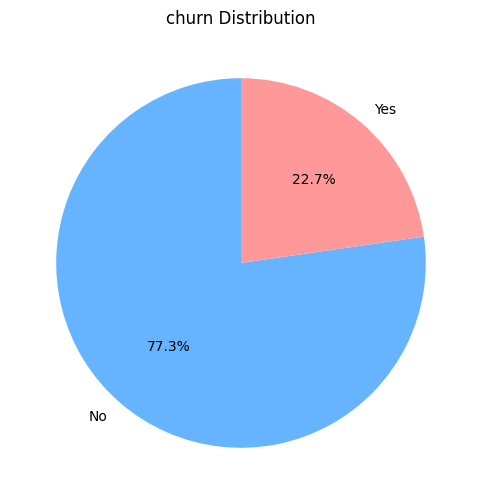


Overall churn Rate: 22.72%


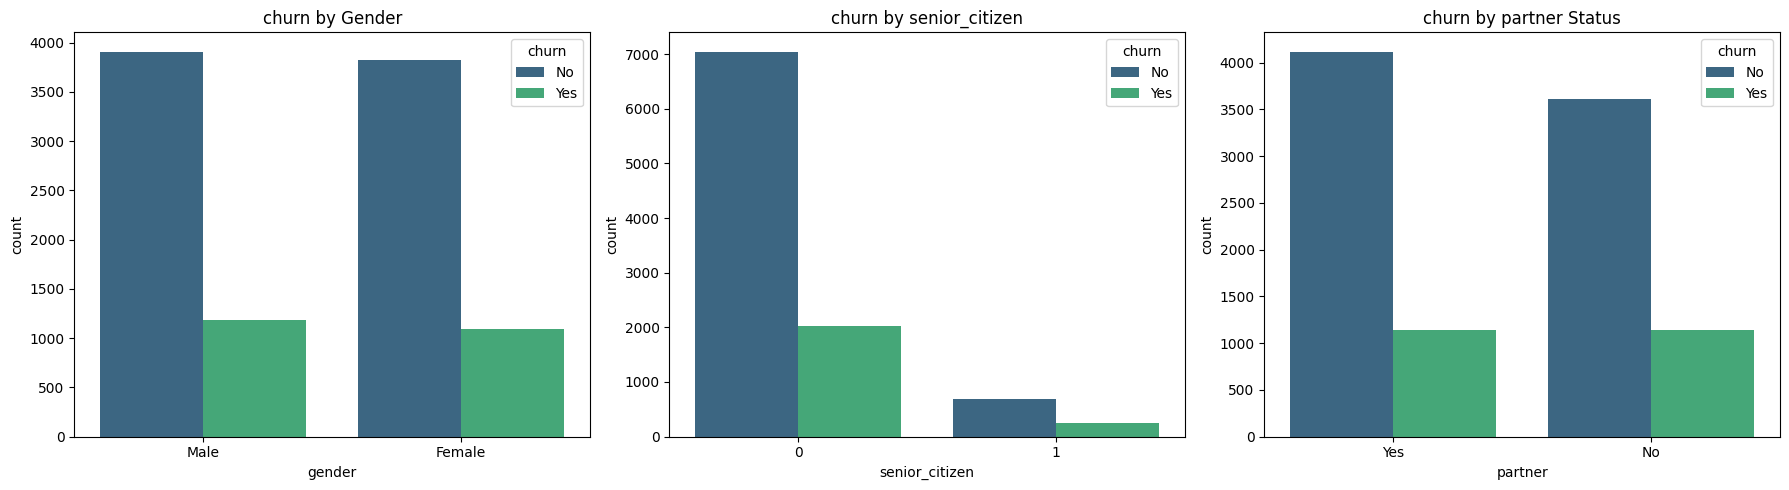

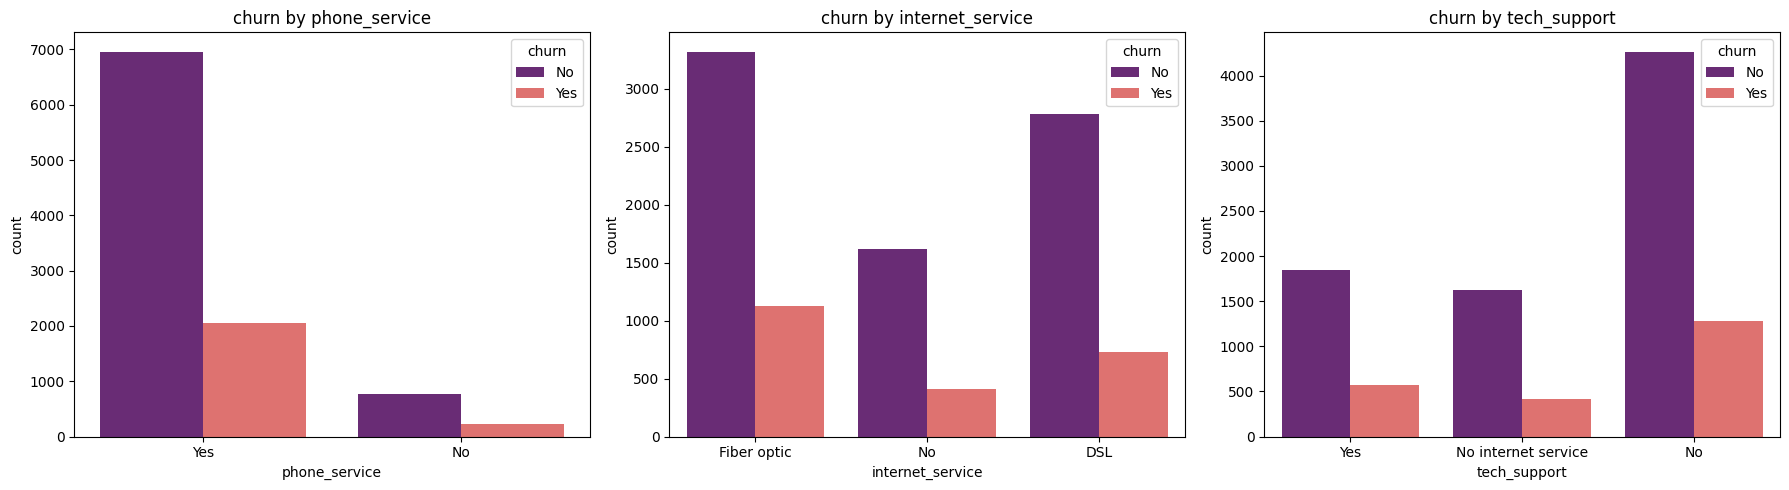

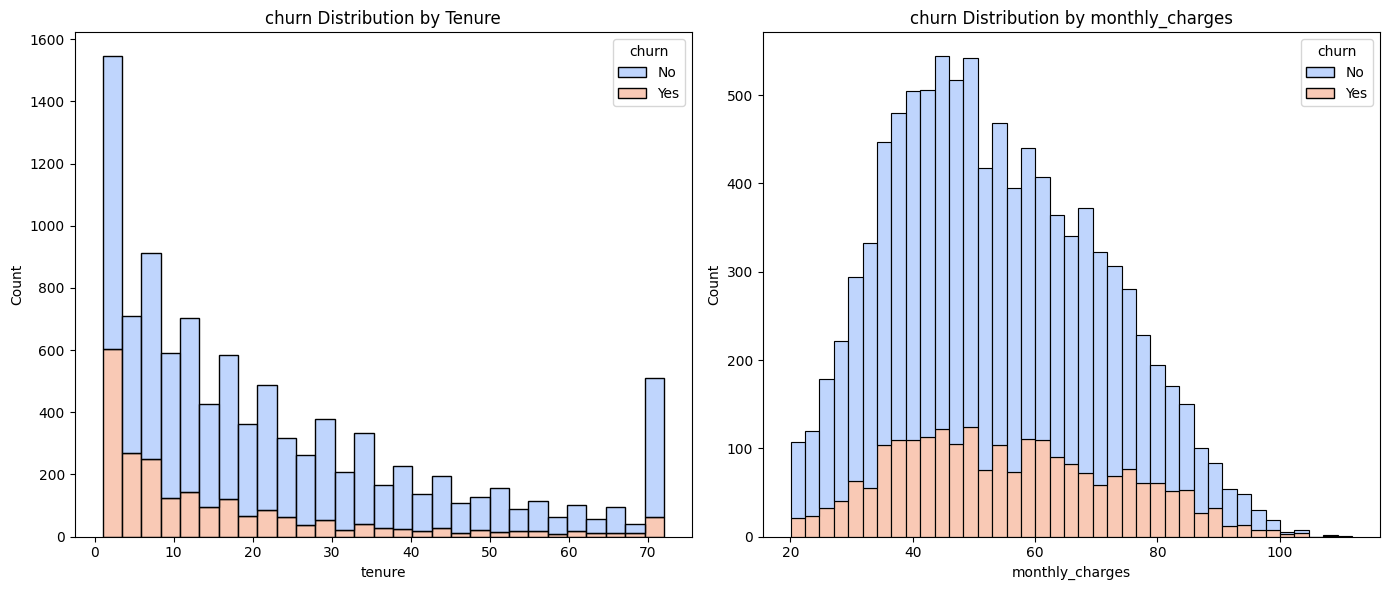

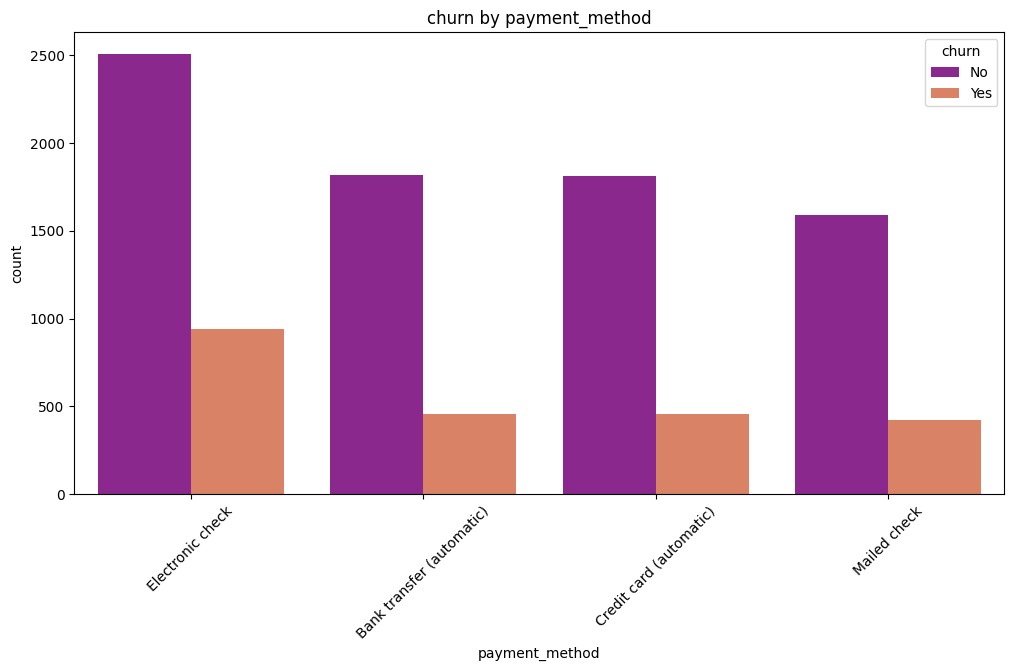

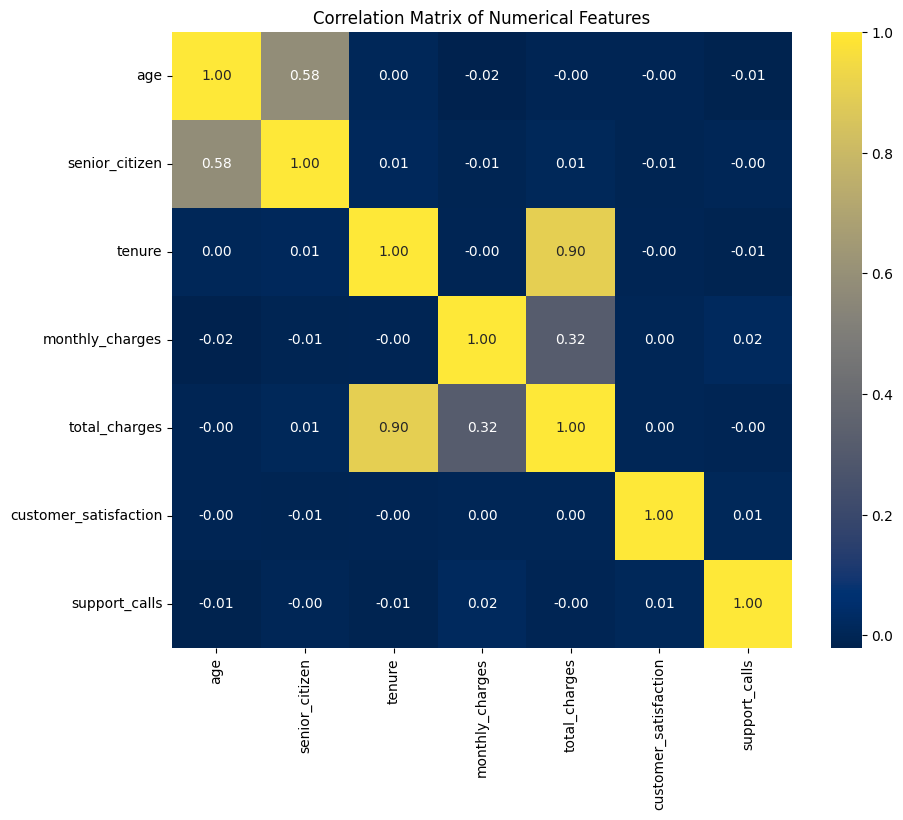

In [ ]:
print("Task 2: Exploratory Data Analysis")

# Analyse churn distribution and calculate churn rate
plt.figure(figsize=(6, 6))
churn_counts = churn_df['churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('churn Distribution')
plt.show()

churn_rate = (churn_df['churn'] == 'Yes').sum() / len(churn_df)
print(f"\nOverall churn Rate: {churn_rate:.2%}")


# Examine demographic patterns and service usage impact on churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(ax=axes[0], x='gender', hue='churn', data=churn_df, palette='viridis')
axes[0].set_title('churn by Gender')
sns.countplot(ax=axes[1], x='senior_citizen', hue='churn', data=churn_df, palette='viridis')
axes[1].set_title('churn by senior_citizen')
sns.countplot(ax=axes[2], x='partner', hue='churn', data=churn_df, palette='viridis')
axes[2].set_title('churn by partner Status')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(ax=axes[0], x='phone_service', hue='churn', data=churn_df, palette='magma')
axes[0].set_title('churn by phone_service')
sns.countplot(ax=axes[1], x='internet_service', hue='churn', data=churn_df, palette='magma')
axes[1].set_title('churn by internet_service')
sns.countplot(ax=axes[2], x='tech_support', hue='churn', data=churn_df, palette='magma')
axes[2].set_title('churn by tech_support')
plt.tight_layout()
plt.show()


# Investigate financial factors and payment method effects
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(ax=axes[0], data=churn_df, x='tenure', hue='churn', multiple='stack', palette='coolwarm')
axes[0].set_title('churn Distribution by Tenure')
sns.histplot(ax=axes[1], data=churn_df, x='monthly_charges', hue='churn', multiple='stack', palette='coolwarm')
axes[1].set_title('churn Distribution by monthly_charges')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='payment_method', hue='churn', data=churn_df, palette='plasma')
plt.title('churn by payment_method')
plt.xticks(rotation=45)
plt.show()


# Create correlation analysis for numerical features
num_cols = churn_df.select_dtypes(include=np.number).columns
correlation_matrix = churn_df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Task 3

In [ ]:
print("Task 3: Data Preprocessing")

# Encode categorical variables and scale numerical features
binary_cols = ['gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn']
for col in binary_cols:
    churn_df[col] = churn_df[col].apply(lambda x: 1 if x == 'Yes' or x == 'Male' else 0)

categorical_cols = churn_df.select_dtypes(include=['object']).columns
churn_df = pd.get_dummies(churn_df, columns=categorical_cols, drop_first=True)

print("\n--- Data Head After Encoding ---")
print(churn_df.head())
print("\n--- Data Shape After Encoding ---")
print(churn_df.shape)


# Perform feature engineering if beneficial
numerical_features = ['tenure', 'monthly_charges', 'total_charges']

data_tensor = torch.tensor(churn_df[numerical_features].values, dtype=torch.float32)

min_vals = data_tensor.min(dim=0, keepdim=True).values
max_vals = data_tensor.max(dim=0, keepdim=True).values
scaled_tensor = (data_tensor - min_vals) / (max_vals - min_vals)

churn_df[numerical_features] = scaled_tensor.numpy()

print("\n--- Data Head After Scaling ---")
print(churn_df.head())


# Split data
X = churn_df.drop('churn', axis=1)
y = churn_df['churn']

X_tensor = torch.tensor(X.astype(np.float32).values)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

torch.manual_seed(42)
indices = torch.randperm(len(X_tensor))

train_size = int(0.7 * len(X_tensor))
val_size = int(0.15 * len(X_tensor))
test_size = len(X_tensor) - train_size - val_size

train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

X_train, y_train = X_tensor[train_indices], y_tensor[train_indices]
X_val, y_val = X_tensor[val_indices], y_tensor[val_indices]
X_test, y_test = X_tensor[test_indices], y_tensor[test_indices]

print(f"\nTrain set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Task 3: Data Preprocessing

--- Data Head After Encoding ---
   age  gender  senior_citizen  partner  dependents    tenure  phone_service  \
0   52       0               0        0           0  0.084507              0   
1   42       0               0        0           0  0.436620              0   
2   54       0               0        0           0  0.154930              0   
3   67       0               1        0           0  0.028169              0   
4   41       0               0        0           0  0.084507              0   

   paperless_billing  monthly_charges  total_charges  ...  tech_support_Yes  \
0                  0         0.208479       0.038867  ...              True   
1                  0         0.221338       0.179420  ...             False   
2                  0         0.705318       0.131299  ...             False   
3                  0         0.371513       0.021597  ...             False   
4                  0         0.563644       0.063280  ...      

Task 4

In [50]:
print("Task 4: Model Development")

# Implement Logistic Regression
input_features = X_train.shape[1]
output_features = 1
learning_rate = 0.01
epochs = 1000

# model def
model_lr = torch.nn.Linear(input_features, output_features)
criterion_lr = torch.nn.BCEWithLogitsLoss() # Numerically stable
optimizer_lr = torch.optim.SGD(model_lr.parameters(), lr=learning_rate)

# training loop
for epoch in range(epochs):
    outputs = model_lr(X_train)
    loss = criterion_lr(outputs, y_train)

    optimizer_lr.zero_grad()
    loss.backward()
    optimizer_lr.step()

    if (epoch + 1) % 100 == 0:
        print(f'Logistic Regression - Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("\nLogistic Regression training complete.")

Task 4: Model Development
Logistic Regression - Epoch [100/1000], Loss: 0.0013
Logistic Regression - Epoch [200/1000], Loss: 0.0008
Logistic Regression - Epoch [300/1000], Loss: 0.0006
Logistic Regression - Epoch [400/1000], Loss: 0.0005
Logistic Regression - Epoch [500/1000], Loss: 0.0004
Logistic Regression - Epoch [600/1000], Loss: 0.0003
Logistic Regression - Epoch [700/1000], Loss: 0.0003
Logistic Regression - Epoch [800/1000], Loss: 0.0003
Logistic Regression - Epoch [900/1000], Loss: 0.0002
Logistic Regression - Epoch [1000/1000], Loss: 0.0002

Logistic Regression training complete.


Task 5

Task 5: Model Evaluation
Logistic Regression Validation Metrics
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


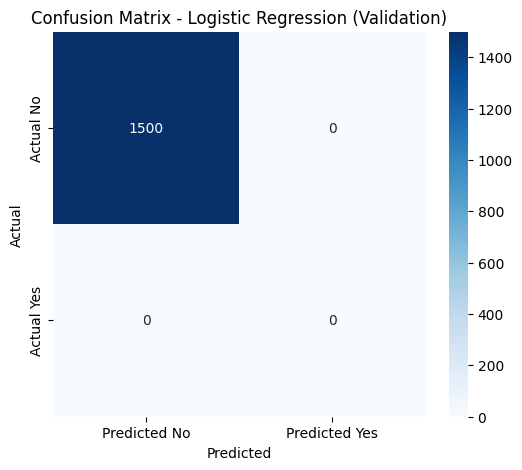

Testing Best Model (Logistic Regression) on Test Set
Logistic Regression Test Metrics
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


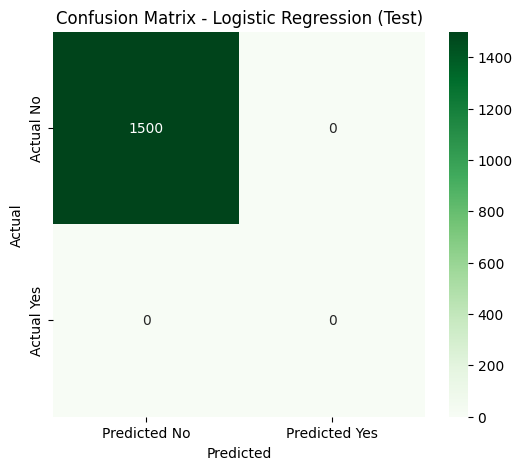

In [ ]:
print("Task 5: Model Evaluation")

#  Evaluate using Accuracy, Precision, Recall, F1-Score
with torch.no_grad():
    y_val_pred_logits = model_lr(X_val)
    y_val_pred = torch.sigmoid(y_val_pred_logits)
    y_val_pred_class = (y_val_pred > 0.5).float()

    # calculate metrics
    tp = ((y_val_pred_class == 1) & (y_val == 1)).sum().item()
    tn = ((y_val_pred_class == 0) & (y_val == 0)).sum().item()
    fp = ((y_val_pred_class == 1) & (y_val == 0)).sum().item()
    fn = ((y_val_pred_class == 0) & (y_val == 1)).sum().item()

    accuracy = (tp + tn) / len(y_val)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("Logistic Regression Validation Metrics")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")

# Create confusion matrices and compare model performances
    conf_matrix = np.array([[tn, fp], [fn, tp]])
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title('Confusion Matrix - Logistic Regression (Validation)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Select best model and test on test set
print("Testing Best Model (Logistic Regression) on Test Set")
with torch.no_grad():
    y_test_pred_logits = model_lr(X_test)
    y_test_pred = torch.sigmoid(y_test_pred_logits)
    y_test_pred_class = (y_test_pred > 0.5).float()

    tp_test = ((y_test_pred_class == 1) & (y_test == 1)).sum().item()
    tn_test = ((y_test_pred_class == 0) & (y_test == 0)).sum().item()
    fp_test = ((y_test_pred_class == 1) & (y_test == 0)).sum().item()
    fn_test = ((y_test_pred_class == 0) & (y_test == 1)).sum().item()

    accuracy_test = (tp_test + tn_test) / len(y_test)
    precision_test = tp_test / (tp_test + fp_test) if (tp_test + fp_test) > 0 else 0
    recall_test = tp_test / (tp_test + fn_test) if (tp_test + fn_test) > 0 else 0
    f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test) if (precision_test + recall_test) > 0 else 0

    print("Logistic Regression Test Metrics")
    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"F1-Score: {f1_score_test:.4f}")

    conf_matrix_test = np.array([[tn_test, fp_test], [fn_test, tp_test]])
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greens',
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title('Confusion Matrix - Logistic Regression (Test)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()